# ACTIVIDAD 2 - Clasificación con Máquina de Vectores de Soporte y Redes de Neuronas.

Javier Blasco


# Índice
[1. Preparación del entorno](#1)   
&nbsp;&nbsp;[1.1. Importación de librerías](#1.1)  
&nbsp;&nbsp;[1.2. Carga de dataframe](#1.2)  
[2. ETL](#2)   
&nbsp;&nbsp;[2.1. Limpieza del dato](#2.1)  
&nbsp;&nbsp;[2.2. Datos estadísticos](#2.2)  
&nbsp;&nbsp;[2.3. Correlación de los datos](#2.3)    
&nbsp;&nbsp;[2.4. Datos finales](#2.4)      
[3. Máquina de vectores de soporte](#3)   
&nbsp;&nbsp;[3.1 Máquina de vectores de soporte lineal](#3.1)       
&nbsp;&nbsp;[3.2 Máquina de vectores de soporte no lineal](#3.2)             
[4. Redes neuronales](#4)     
&nbsp;&nbsp;[4.1 Keras Neural Network](#4.1)    
&nbsp;&nbsp;[4.2 Sklearn Neural Network](#4.2)    
&nbsp;&nbsp;&nbsp;&nbsp;[4.2.1 Validación cruzada](#4.2.1)   
&nbsp;&nbsp;&nbsp;&nbsp;[4.2.2 Elección rango de aprendizaje inicial óptimo](#4.2.2)    
&nbsp;&nbsp;&nbsp;&nbsp;[4.2.3 Elección momentum óptimo](#4.2.3)    
&nbsp;&nbsp;&nbsp;&nbsp;[4.2.4 Ejecución](#4.2.4)    
[5. Conclusiones](#5) 


# 1. Preparación del entorno <a name="1"></a>

## 1.1 Importación de librerías <a name="1.1"></a>

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# Representacion y graficos
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plot

from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense

## 1.2 Carga del dataframe <a name="1.2"></a>

In [2]:
from google.colab import drive, auth

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = ""

for dirname, _, filenames in os.walk('drive/MyDrive/Master IA/ML_Act2/'):
    for filename in filenames:
        if "datasets_train.csv" in filename:
          path = os.path.join(dirname, filename)


df = pd.read_csv(path)

print(df.shape)
df.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# 2. ETL <a name="2"></a>

## 2.1 Limpieza del dato <a name="2.1"></a>

Revisamos si existe alguna variable categórica como indica el enunciando, pero comprobamos que no existe ninguna.

In [4]:
numericos = [f for f in df.columns if df.dtypes[f] != 'object']
numericos.remove('price_range')
categoricos = [f for f in df.columns if df.dtypes[f] == 'object']

print(f"Número de Columnas de datos categoricos: {len(categoricos)}\n")
if len(categoricos) > 0:
  print(f"Columnas de datos categoricos: {len(numericos)}\n\n")

print(f"Número de columnas de datos numericos: {len(numericos)}")
if len(numericos) > 0:
  print(f"Columnas de datos numericos: {numericos}")

Número de Columnas de datos categoricos: 0

Número de columnas de datos numericos: 20
Columnas de datos numericos: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


## 2.2 Datos estadísticos <a name="2.2"></a>

De las variables numéricas se muestran los distintos datos de media, mediana, mínimo, máximo y cuartiles.

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Comprobamos la cantidad de datos nulos del dataset, a pesar de que con info() nos ha indicado que no existen:

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 2.3 Correlaciones de los datos <a name="2.3"></a>

Primero de todo, encontramos la matriz de correlación con todas las variables.

In [8]:
df.corr(method="pearson")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Para poder identificar mejor las variables correlacionadas entre si, se ha realizado un mapa de calor, donde los valores de correlación mayores a 0.75 son mostrados en blanco. Como el valor de price_range es la variable de interés para el problema, se ha puesto como primera variable, y se han ordenado las otras a partir de esta.

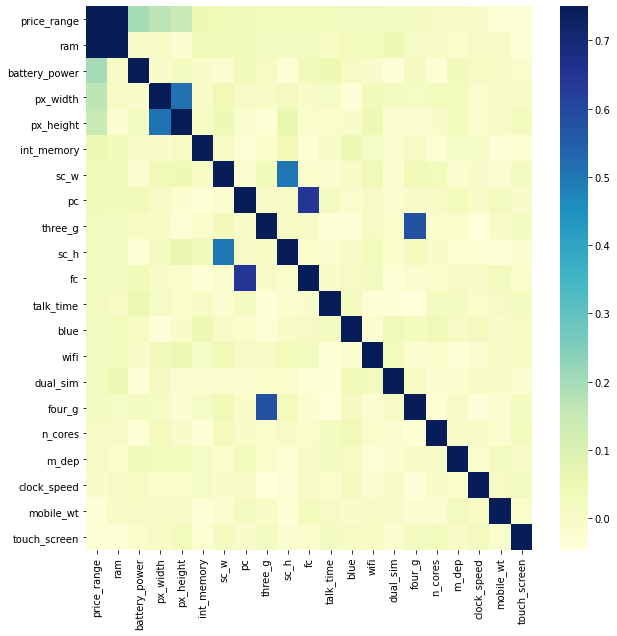

In [9]:
train = df
columns = df.corr(method="pearson")["price_range"].sort_values(ascending=False)[:].index 

corr = train[columns].corr(method="pearson")

plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="YlGnBu", vmax=0.75);

Como se puede observar, las variables de mayor importancia para la prediccion del rango de precio son:     
ram, battery_power, px_width, px_height, estando estas 2 últimas muy correlacionadas entre sí

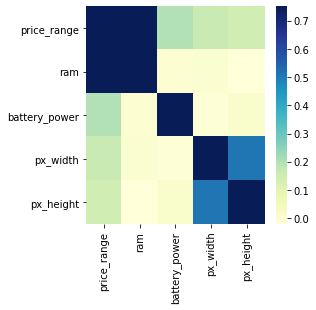

In [10]:
df2 = df[["price_range", 'ram', 'battery_power', 'px_width', 'px_height']]
train = df2
columns = df2.corr(method="pearson")["price_range"].sort_values(ascending=False)[:].index 

corr = train[columns].corr(method="pearson")

plt.figure(figsize=(4,4))
sns.heatmap(corr, cmap="YlGnBu", vmax=0.75);

df2 supone un excesivo acotamiento de los datos por lo que puede generar un peor resultado del modelo predictivo

para optimizar la evaluación de los datos eliminaremos las variables que tienen alta correlación con otra variable del modelo pero poca correlacion con la variable objetivo, en concreto eliminaremos fc por su alta correlacion con pc y four_g por su correlación con three_g

In [11]:
try:
  df = df.drop(['fc', 'four_g'], axis=1)
except:
  pass  # Ya han sido eliminadas en una ejecución anterior

Se muestran los 3 valores máximos para cada variable de correlación, ignorando la correlación de valor 1 de la misma variable.

In [12]:
for column in columns:
  temp = df.corr(method="pearson")[column].sort_values(ascending=False)[1:4]
  print("{}: {}".format(column,temp))
  print("-------------------------------------")

price_range: ram              0.917046
battery_power    0.200723
px_width         0.165818
Name: price_range, dtype: float64
-------------------------------------
ram: price_range    0.917046
dual_sim       0.041072
sc_w           0.035576
Name: ram, dtype: float64
-------------------------------------
battery_power: price_range    0.200723
talk_time      0.052510
m_dep          0.034085
Name: battery_power, dtype: float64
-------------------------------------
px_width: px_height      0.510664
price_range    0.165818
sc_w           0.034699
Name: px_width, dtype: float64
-------------------------------------
px_height: px_width       0.510664
price_range    0.148858
sc_h           0.059615
Name: px_height, dtype: float64
-------------------------------------


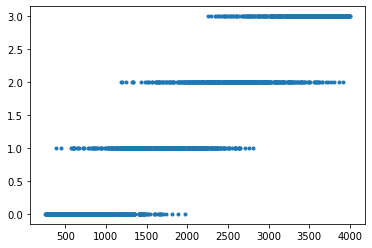

In [13]:
plt.scatter(df["ram"], df["price_range"], marker='.')


Como se puede observar en esta representación de los datos exite una relación muy lineal entre RAM y el rango de precio del teléfono

## 2.4 Datos finales <a name="2.4"></a>

elegimos la variable objetivo y dividimos el conjunto entre entrenamiento y validación

In [14]:
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# 3. Máquina de vectores de soporte  <a name="3"></a>

## 3.1 Máquina de vectores de soporte lineal <a name="3.1"></a>

In [15]:
svclassifier = SVC(kernel='linear')
clf = svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[101   2   0   0]
 [  2  92   1   0]
 [  0   4  96   2]
 [  0   0   2  98]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       103
           1       0.94      0.97      0.95        95
           2       0.97      0.94      0.96       102
           3       0.98      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## 3.2 Máquina de vectores de soporte no lineales <a name="3.2"></a>

In [16]:
for k in ['poly', 'rbf', 'sigmoid']:
  print(f'-------------------- SVC tipo: {k} --------------------')
  print(f'-------------------------------------------------------')
  svclassifier = SVC(kernel=k)
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)

  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(f'-------------------------------------------------------')

-------------------- SVC tipo: poly --------------------
-------------------------------------------------------
[[103   0   0   0]
 [ 11  81   3   0]
 [  0   6  93   3]
 [  0   0   3  97]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       103
           1       0.93      0.85      0.89        95
           2       0.94      0.91      0.93       102
           3       0.97      0.97      0.97       100

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.94      0.94      0.93       400

-------------------------------------------------------
-------------------- SVC tipo: rbf --------------------
-------------------------------------------------------
[[103   0   0   0]
 [  4  89   2   0]
 [  0  10  85   7]
 [  0   0   1  99]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       103
           1       0.

A la vista de los resultados, la mejor solución es la máquina de vectores de soporte lineal

# 4. Red neuronal <a name="4"></a>

## 4.1 Keras Neural Network <a name="4.1"></a>

In [17]:
# define the keras model
model = Sequential()
model.add(Dense(2, input_dim=18, activation='linear'))
model.add(Dense(4, activation='linear'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=500, batch_size=5, verbose=0)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)


print(classification_report(y_test, y_pred_bool))


13/13 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.4700
Accuracy: 47.00
7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       103
           1       0.00      0.00      0.00        95
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00       100

    accuracy                           0.26       400
   macro avg       0.06      0.25      0.10       400
weighted avg       0.07      0.26      0.11       400



La red neuronal Keras da una muy baja precisión, por lo que debemos probar con otro tipo de red neuronal.
Nota: se utilizó como activación una función lineal ya que con otras funciones generaba soluciones con precisión más bajas.

## Sklearn Neural Network  <a name="4.2"></a>

### 4.2 Validación cruzada  <a name="4.2"></a>

In [18]:
# Split the data - training set and testing set (for generalization)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=1234)

In [19]:
# Split the training set above into 2 sets: smaller training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, train_size=0.8, random_state=1234)

### 4.2.1 Elección del rango de aprendizaje inicial óptimo  <a name="4.2.1"></a>

In [25]:
df_lri = pd.DataFrame(columns=['learning_rate_init', 'Accuracy'])
# The range
lriRange = np.arange(0.00001, 0.002, 0.00001)
# The best  value
bestlri = -1
# The highest accuracy
highestAccuracy = 0.0

# Iterate through the range of values for parameter learning_rate_init
for lri in lriRange:
    # Create the  with the current ranged-value and all other params set to default
    model = MLPClassifier(random_state=1234, solver='sgd', activation='logistic', learning_rate='adaptive', learning_rate_init=lri)
                                                             
    # Train the model
    model.fit(X_train, y_train)
    
    # Base on what the model has learned set it to predict the outcome of the validation set
    y_pred = model.predict(X_test)
    
    # Determine the model's accuracy on the validation set
    modelAccuracy = accuracy_score(y_test, y_pred)*100
    
    # Save the data and plot later
    df_lri = df_lri.append({'learning_rate_init':lri, 'Accuracy':modelAccuracy}, ignore_index=True)
    
    # Save the highest accuracy based on the training size
    if modelAccuracy > highestAccuracy:
        bestlri = lri
        highestAccuracy = modelAccuracy
        
print(df_lri.loc[df_lri['Accuracy'].idxmax()])
l_i = df_lri.loc[df_lri['Accuracy'].idxmax()].learning_rate_init

learning_rate_init     0.00168
Accuracy              61.87500
Name: 167, dtype: float64


### 4.2.2 Elección del momentum óptimo <a name="4.2.2"></a>

In [26]:
'''Determine best momentum value for best training size identified above'''
# A dataframe keeping track of the progress and for plotting later
df_m = pd.DataFrame(columns=['momentum', 'Accuracy'])
# The range
momRange = np.arange(0.01, 1.0, 0.01)
# The best  value
bestMom = -1
# The highest accuracy
highestAccuracy = 0.0

# Iterate through the range of values for parameter momentum
for mom in momRange:
    # Create the  with the current ranged-value and all other params set to default
    model = MLPClassifier(random_state=1234, solver='sgd', activation='logistic', learning_rate='adaptive', learning_rate_init=l_i, momentum=mom)
                                                             
    # Train the model
    model.fit(X_train, y_train)
    
    # Base on what the model has learned set it to predict the outcome of the validation set
    y_pred = model.predict(X_test)
    
    # Determine the model's accuracy on the validation set
    modelAccuracy = accuracy_score(y_test, y_pred)*100
    
    # Save the data and plot later
    df_m = df_m.append({'momentum':mom, 'Accuracy':modelAccuracy}, ignore_index=True)
    
    # Save the highest accuracy based on the training size
    if modelAccuracy > highestAccuracy:
        bestMom = mom
        highestAccuracy = modelAccuracy

print(df_m.loc[df_m['Accuracy'].idxmax()])
momentum = df_m.loc[df_m['Accuracy'].idxmax()].momentum

momentum     0.900
Accuracy    61.875
Name: 89, dtype: float64


### 4.2.3 Ejecución  <a name="4.2.3"></a>

In [27]:
# Optimal identified params
model = MLPClassifier(random_state=1234, solver='sgd', activation='logistic', learning_rate='adaptive', learning_rate_init=l_i, momentum=momentum, max_iter=200, hidden_layer_sizes=2450)
# cross_val_score will split the training data for me - in this case 4 sets
crossVal = cross_validate(model,X_train, y_train, cv=4, scoring='accuracy', return_estimator=True)
print(f"The accuracy scores of the 4 models under cross-validation: {list(crossVal['test_score'])}")

# Get the classifier that did the best
scores = list(crossVal['test_score'])
index = scores.index(max(scores))
bestModel = crossVal['estimator'][index]
print("Best Model's accuracy using cross-validation: {0:.2f}%".format(scores[index]*100))

# Base on what the model has learned set it to predict the outcome of the TEST set
y_pred = bestModel.predict(X_test)

# Determine the model's accuracy on the TEST set
modelAccuracy = accuracy_score(y_test, y_pred)*100
print("Best Model's accuracy against Test Dataset: {0:.2f}%".format(modelAccuracy))
print(classification_report(y_test, y_pred))

The accuracy scores of the 4 models under cross-validation: [0.603125, 0.640625, 0.68125, 0.653125]
Best Model's accuracy using cross-validation: 68.12%
Best Model's accuracy against Test Dataset: 63.75%
              precision    recall  f1-score   support

           0       0.90      0.66      0.77        86
           1       0.54      0.52      0.53        69
           2       0.49      0.39      0.43        75
           3       0.63      0.91      0.74        90

    accuracy                           0.64       320
   macro avg       0.64      0.62      0.62       320
weighted avg       0.65      0.64      0.63       320



Tras la ejecución, la solución con mayor precisión dentro de las redes neuronales es la red neuronal de sklearn 

# 5. Conclusiones  <a name="5"></a>

A la vista de los resultados podemos confirmar que genera una mejor predicción la máquina de vectores de soporte que las redes neuronales, además de ejecutarse con una velocidad mucho mayor, ya que las redes neuronales no sólo su ejecución es más lenta sino que además es necesario encontrar el momentum y el rango de aprendizaje inicial, con el coste computacional que eso conlleva.
